데이터 분석 연습 - 건강정보 분석①

본 분석1에서는 가설1과 가설2에 대한 내용을 다룸.

- 가설1. 흡연자의 LDL 콜레스테롤 수치와 총콜레스테롤, 트리글리세이드 수치가 비흡연자에 비해 높을까?
- 가설2. 흡연자의 HDL 콜레스테롤 수치는 비흡연자에 비해 낮을까?


- 검증1. 음주와 흡연 중 고혈압에 더 치명적인 것은? (혈압 수치가 140/90 이상일 경우 고혈압으로 간주)
- 검증2. 음주와 흡연 중 고혈압에 더 치명적인 것은? (공복 혈당이 126㎎/㎗ 이상이거나 혈색소 6.5% 이상인 사람을 당뇨병 환자로 간주) 
- ____검증2-1. 흡연 중인 사람의 당뇨병 유병률은 일반인보다 두 배 가량 높을까?
- ____검증2-2. 정말로 30세 이상 한국인 중엔 7명 중 1명(13.7%) 꼴로 당뇨병 환자일까?
- 검증3. 혈압과 혈색소의 간에 상관관계가 있을까?


[기사1 - 기사 내용 중]
흡연 시 지방산 분해가 증가하면서 혈중 유리지방산이 증가하는데, 여러 논문의 메타 분석 결과, 비흡연자보다 흡연자의 총콜레스테롤, 중성지방, LDL 콜레스테롤 농도가 각각 3%, 9.1%, 1.7% 증가했으며, 좋은 콜레스테롤인 HDL 콜레스테롤은 5.7% 감소했다. 반대로 금연을 하면 HDL 콜레스테롤 수치가 유의하게 상승했다.
[출처] : https://www.hidoc.co.kr/healthstory/news/C0000465002 | 하이닥


[기사2 - 기사 내용 중]
이 연구에서 30세 이상 한국인 7명 중 1명(13.7%) 꼴인 약 480만명이 당뇨병 환자인 것으로 추산했다. 남성의 당뇨병 유병률(15.7%)이 여성(11.9%)보다 높았다. 특히 40대 남성의 당뇨병 유병률은 12.1%로, 같은 연령대 여성(5.7%)의 두 배 이상이었다. 70대 이상에선 여성의 당뇨병 유병률(33.8%)이 남성(27.2%)을 앞질렀다. 현재 흡연 중이거나 고위험 음주를 하는 사람의 당뇨병 유병률은 각각 27.4%ㆍ14.3%였다. 이는 흡연자의 당뇨병 위험이 일반인의 두 배란 의미다. 연구팀은 공복 혈당이 126㎎/㎗ 이상이거나 현재 당뇨병 치료제를 복용 중이거나 과거 당뇨병 병력 또는 당화 혈색소 6.5% 이상인 사람을 당뇨병 환자로 분류했다.
출처 : https://www.edaily.co.kr/news/read?newsId=01544886619310600&mediaCodeNo=257&OutLnkChk=Y


-데이터 정보 : [흡연상태] 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)

In [1]:
# 기본 라이브러리 호출
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 글씨체 및 선명도를 위한 다양한 호출
from IPython.display import set_matplotlib_formats
sns.set(font="Malgun Gothic")
set_matplotlib_formats('retina')

plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('./data/건강검진정보(2017).csv', encoding='cp949')
print(df.shape)
df.head()

(1000000, 34)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


# 0. 기본적인 정보 확인 및 전처리(칼럼수정 및 삭제)

In [4]:
df.rename(columns={df.columns[5]:'신장'}, inplace=True)
df.rename(columns={df.columns[6]:'체중'}, inplace=True)
# CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장,체중,허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


In [5]:
df.describe()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장,체중,허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,999734.000000,999817.000000,999811.000000,...,999958.000000,999856.000000,999464.000000,1000000.000000,0.0,0.0,0.0,0.0,400523.000000,1000000.0
mean,2017.0,500000.500000,1.469590,10.527041,33.694584,162.22823,63.268710,81.231603,0.980478,0.978032,...,37.184273,1.607704,0.499293,0.400523,NaN,NaN,NaN,NaN,0.602130,20181126.0
std,0.0,288675.278933,0.499075,2.841183,12.672969,9.28462,12.520732,11.837625,0.608810,0.607122,...,50.624330,0.818454,0.500000,0.490005,NaN,NaN,NaN,NaN,0.590891,0.0
min,2017.0,1.000000,1.000000,5.000000,11.000000,130.00000,25.000000,8.000000,0.100000,0.100000,...,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
25%,2017.0,250000.750000,1.000000,8.000000,27.000000,155.00000,55.000000,74.100000,0.700000,0.700000,...,16.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
50%,2017.0,500000.500000,1.000000,10.000000,41.000000,160.00000,60.000000,81.000000,1.000000,1.000000,...,23.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
75%,2017.0,750000.250000,2.000000,13.000000,43.000000,170.00000,70.000000,87.800000,1.200000,1.200000,...,39.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
max,2017.0,1000000.000000,2.000000,18.000000,50.000000,190.00000,140.000000,999.000000,9.900000,9.900000,...,999.000000,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,20181126.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
기준년도            1000000 non-null int64
가입자일련번호         1000000 non-null int64
성별코드            1000000 non-null int64
연령대코드(5세단위)     1000000 non-null int64
시도코드            1000000 non-null int64
신장              1000000 non-null int64
체중              1000000 non-null int64
허리둘레            999734 non-null float64
시력(좌)           999817 non-null float64
시력(우)           999811 non-null float64
청력(좌)           999842 non-null float64
청력(우)           999844 non-null float64
수축기혈압           999981 non-null float64
이완기혈압           999982 non-null float64
식전혈당(공복혈당)      999958 non-null float64
총콜레스테롤          999957 non-null float64
트리글리세라이드        999955 non-null float64
HDL콜레스테롤        999956 non-null float64
LDL콜레스테롤        997088 non-null float64
혈색소             999948 non-null float64
요단백             995408 non-null float64
혈청크레아티닌         999957 non-null float64
(혈청지오티)AST     

결측치 탐색 결과 구강검진수검여부, 치아우식증유무, 결손치유무, 치아마모증유무, 제3대구치(사랑니)이상 칼럼은 데이터가 하나도 없었다. -> 삭제

In [7]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장                    0
체중                    0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

In [8]:
# 불필요한(칼럼 전체가 결측치인) 칼럼 제거
df_drop = df[['치아우식증유무','결손치유무','치아마모증유무','제3대구치(사랑니)이상']]
print(df_drop.shape)
df_drop.head()

(1000000, 4)


,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [9]:
# 한꺼번에 지우는 법.....?

del df['치아우식증유무']
del df['결손치유무']
del df['치아마모증유무']
del df['제3대구치(사랑니)이상']
print(df.shape)
df.head()

(1000000, 30)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장,체중,허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1,0.0,20181126


데이터 셋이 너무 커서 시간이 너무 소요되므로 1000개의 데이터만 사용하는 샘플 데이터 셋 생성

In [10]:
df_sample = df.sample(1000, random_state=1)
df_sample.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장,체중,허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치석,데이터공개일자
276826,2017,276827,1,12,41,160,55,77.0,0.9,0.9,...,1.0,1.1,31.0,22.0,38.0,3.0,1.0,0,NaN,20181126
849425,2017,849426,1,9,31,170,75,89.9,1.0,1.0,...,1.0,0.9,17.0,19.0,28.0,3.0,1.0,1,1.0,20181126
504499,2017,504500,1,8,42,170,75,86.3,1.5,1.5,...,1.0,1.0,38.0,45.0,121.0,3.0,1.0,1,1.0,20181126
601054,2017,601055,1,14,31,170,70,84.0,0.8,0.9,...,5.0,1.2,34.0,17.0,31.0,3.0,0.0,0,NaN,20181126
980221,2017,980222,1,17,41,160,60,86.0,0.7,0.5,...,1.0,0.8,23.0,22.0,28.0,1.0,0.0,0,NaN,20181126


# 가설1. 흡연자의 LDL 콜레스테롤 수치와 총콜레스테롤, 트리글리세이드 수치가 비흡연자에 비해 높을까?

본 분석만을 위한 부분 데이터셋 생성

In [11]:
a = df[['연령대코드(5세단위)','LDL콜레스테롤', '흡연상태', '성별코드', '총콜레스테롤', 'HDL콜레스테롤','트리글리세라이드']]
print(a.shape)
a.head()

(1000000, 7)


,연령대코드(5세단위),LDL콜레스테롤,흡연상태,성별코드,총콜레스테롤,HDL콜레스테롤,트리글리세라이드
0,8,126.0,1.0,1,193.0,48.0,92.0
1,7,148.0,3.0,1,228.0,55.0,121.0
2,9,74.0,1.0,1,136.0,41.0,104.0
3,11,104.0,1.0,1,201.0,76.0,106.0
4,11,117.0,1.0,1,199.0,61.0,104.0


In [12]:
df.groupby('흡연상태')['LDL콜레스테롤','총콜레스테롤','트리글리세라이드'].agg(['mean'])

,LDL콜레스테롤,총콜레스테롤,트리글리세라이드
,mean,mean,mean
흡연상태,,,
1.0,113.315313,195.302917,115.308176
2.0,112.800533,194.947993,148.088424
3.0,112.264109,196.731964,169.049918


↑일단 정확한 수치상으론 큰 차이가 없어보인다.

[간단한 정보 확인] - 성별 흡연상태, 흡연비율 분석

In [13]:
smoking = pd.DataFrame(df['흡연상태'].value_counts())
smoking['흡연비율'] = df['흡연상태'].value_counts(normalize=True)
smoking

,흡연상태,흡연비율
1.0,607942,0.608030
3.0,215702,0.215733
2.0,176212,0.176237


[흡연상태]
1- 흡연 안하는 상태
2 - 흡연 하는 상태
3 - 흡연했다가 안하는 상태

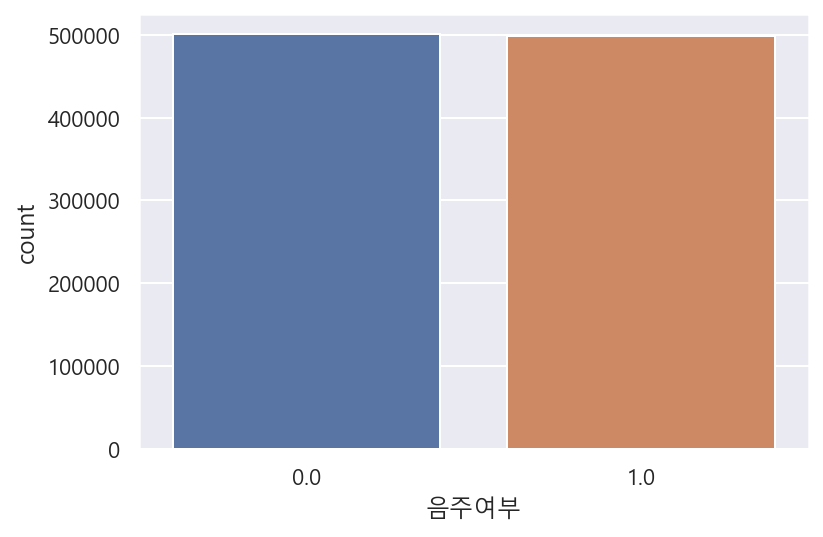

In [16]:
sns.countplot(data=df, x='음주여부')

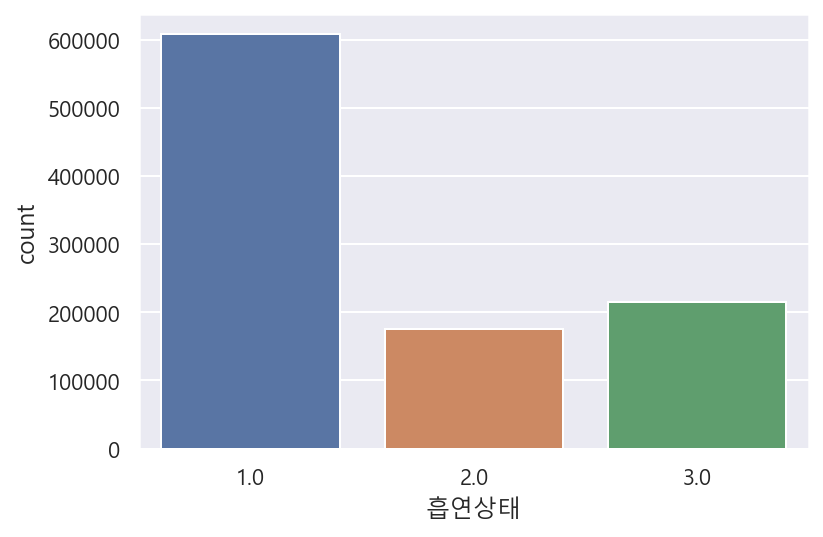

In [17]:
sns.countplot(data=df, x='흡연상태')

흡연 상태별 각 수치 시각화

# LDL콜레스테롤 정보 시각화

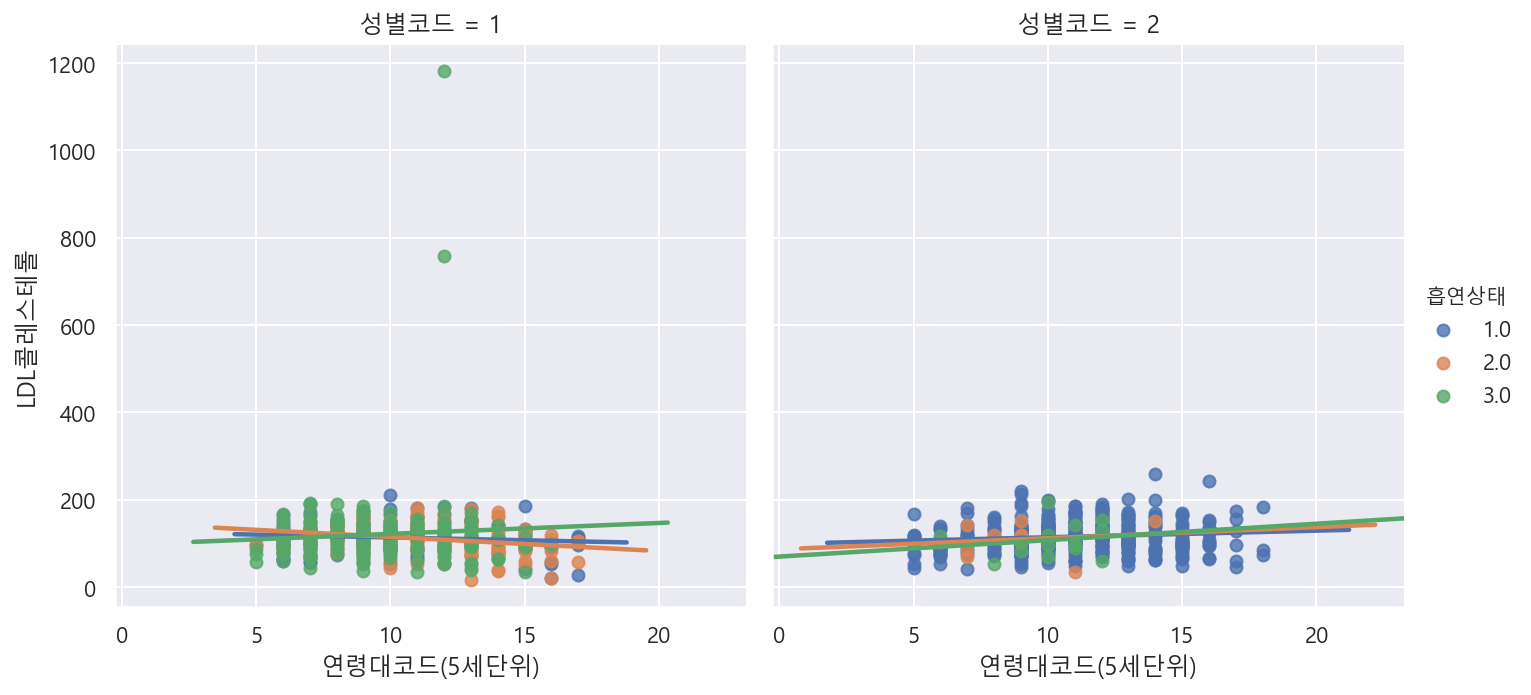

In [18]:
sns.lmplot(data=df_sample, x='연령대코드(5세단위)', y='LDL콜레스테롤', ci=None, hue='흡연상태', col='성별코드')

이상치 제거를 통해 밀집 영역에 집중한다.

In [19]:
# a1 = a[a['LDL콜레스테롤'] < 5000]
a1 = a[a['LDL콜레스테롤'] < 600]

In [20]:
a1_sample = a1.sample(2000, random_state=1)
a1_sample.head()

,연령대코드(5세단위),LDL콜레스테롤,흡연상태,성별코드,총콜레스테롤,HDL콜레스테롤,트리글리세라이드
48718,7,91.0,1.0,1,154.0,54.0,42.0
722730,9,148.0,1.0,2,230.0,74.0,38.0
395694,11,101.0,3.0,1,183.0,67.0,73.0
645612,11,92.0,3.0,1,172.0,46.0,172.0
974802,8,98.0,1.0,1,173.0,64.0,57.0


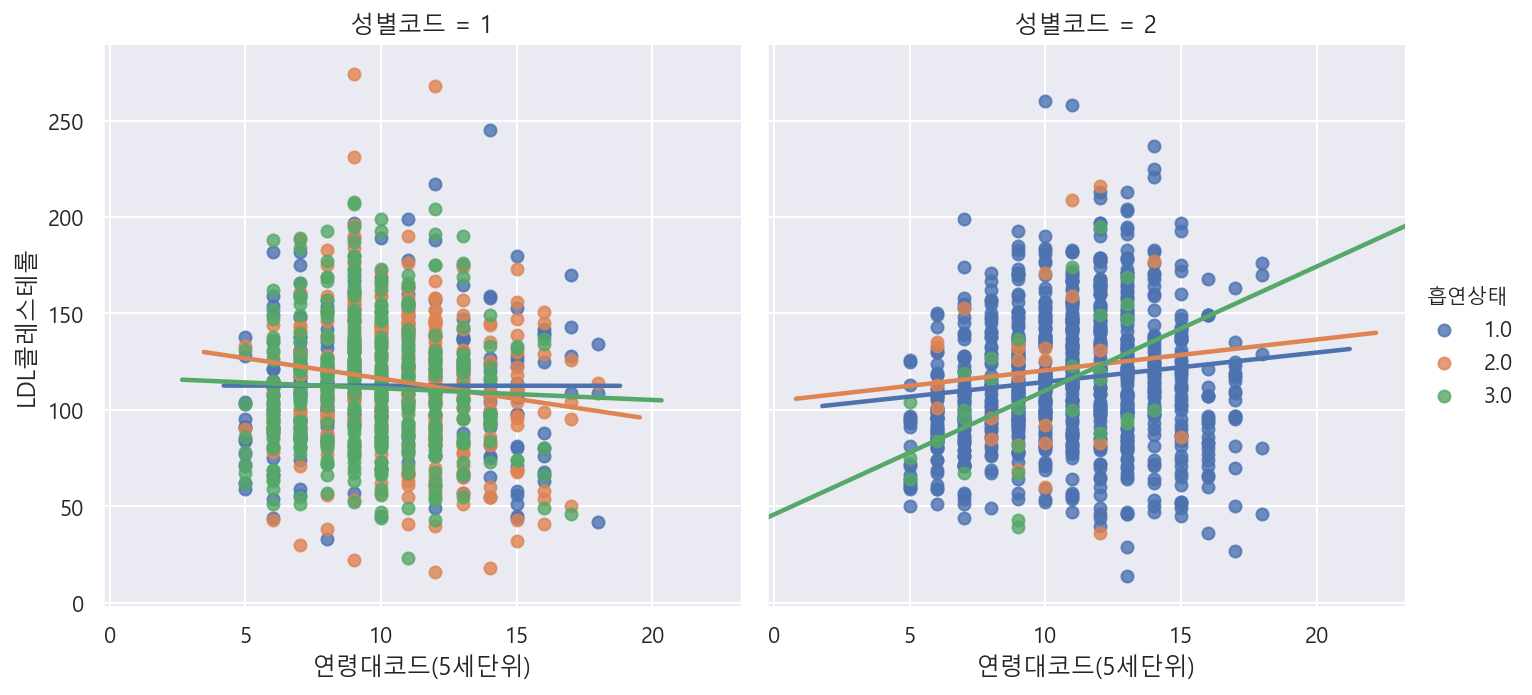

In [21]:
sns.lmplot(data=a1_sample, x='연령대코드(5세단위)', y='LDL콜레스테롤', ci=None, hue='흡연상태', col='성별코드')

↑일반적으로 흡연자가 비흡연자에 비해 LDL콜레스트롤 수치가 높아 보이지만 큰 차이는 없어보인다.

# 총콜레스테롤 정보 시각화

In [23]:
a2 = a[a['총콜레스테롤']<400]   #총콜레스테롤을 1000이하로 설정하여 이상치를 제거했다.
a2_sample = a2.sample(2000, random_state=1)
a2_sample.head()

,연령대코드(5세단위),LDL콜레스테롤,흡연상태,성별코드,총콜레스테롤,HDL콜레스테롤,트리글리세라이드
67352,13,63.0,1.0,1,153.0,60.0,149.0
346421,13,194.0,1.0,2,307.0,49.0,240.0
684778,9,122.0,1.0,2,188.0,52.0,67.0
773174,7,123.0,3.0,1,190.0,46.0,105.0
397092,11,167.0,1.0,2,261.0,79.0,77.0


LDL콜레스테롤과 마찬가지로 큰 차이는 없어보임


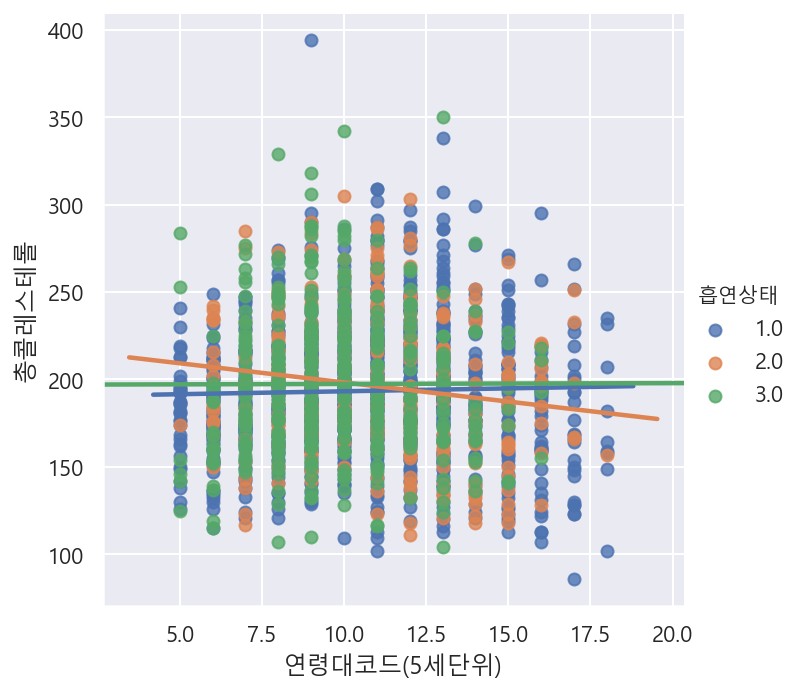

In [24]:
sns.lmplot(data=a2_sample, x='연령대코드(5세단위)', y='총콜레스테롤', ci=None, hue='흡연상태')
print("LDL콜레스테롤과 마찬가지로 큰 차이는 없어보임")

# 트리글리세라이드 수치 시각화

In [25]:
a3 = df[df['트리글리세라이드'] < 750]
print(a3.shape)
a3.head()

(996790, 30)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장,체중,허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1,0.0,20181126


In [26]:
a3_sample = a3.sample(2000, random_state=1)

흡연자가 다소 높아보이기는 하나 역시 현저한 차이는 눈에 띄지 않는다.


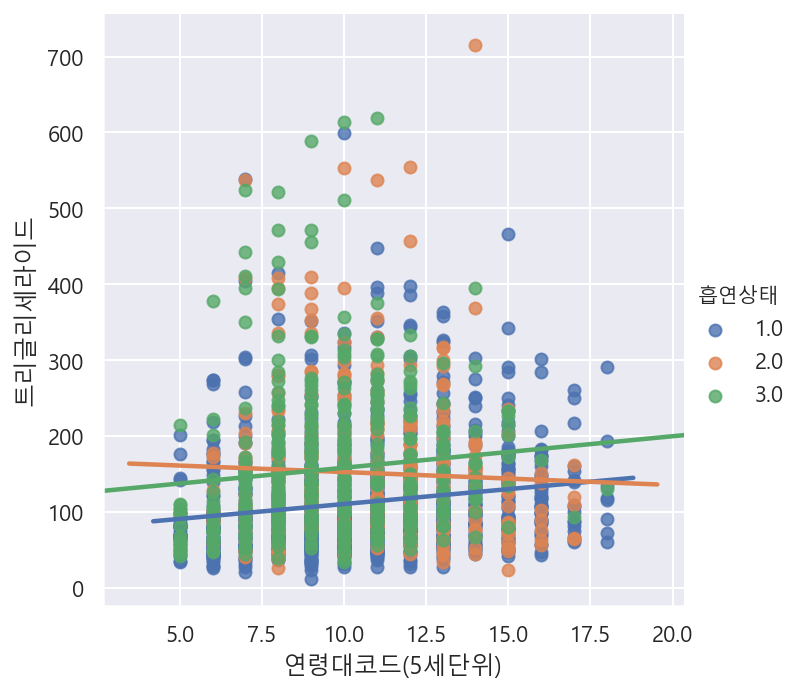

In [27]:
sns.lmplot(data=a3_sample, x='연령대코드(5세단위)', y='트리글리세라이드', ci=None, hue='흡연상태')
print("흡연자가 다소 높아보이기는 하나 역시 현저한 차이는 눈에 띄지 않는다.")

# 대상을 변경하여 다시 진행 : 비음주자 대상

근거 : 음주 여부가 콜레스테롤 수치에 영향을 미칠 수도 있으나 음주를 하지 않는 사람들을 대상으로 그래프를 그려보자.

In [28]:
df_nonalcohol = df[df['음주여부'] == 0]
df_nonalcohol.shape

(500439, 30)

In [29]:
df_nonalcohol_sample = df_nonalcohol.sample(10000, random_state=1)

In [30]:
df_nonalcohol_LDL = df_nonalcohol[df_nonalcohol['LDL콜레스테롤'] < 400]

# 가설2. 흡연자의 HDL 콜레스테롤 수치는 비흡연자에 비해 낮을까?

In [37]:
df_sample_HDL = df_sample[df_sample['HDL콜레스테롤']>20]

<Figure size 720x720 with 0 Axes>

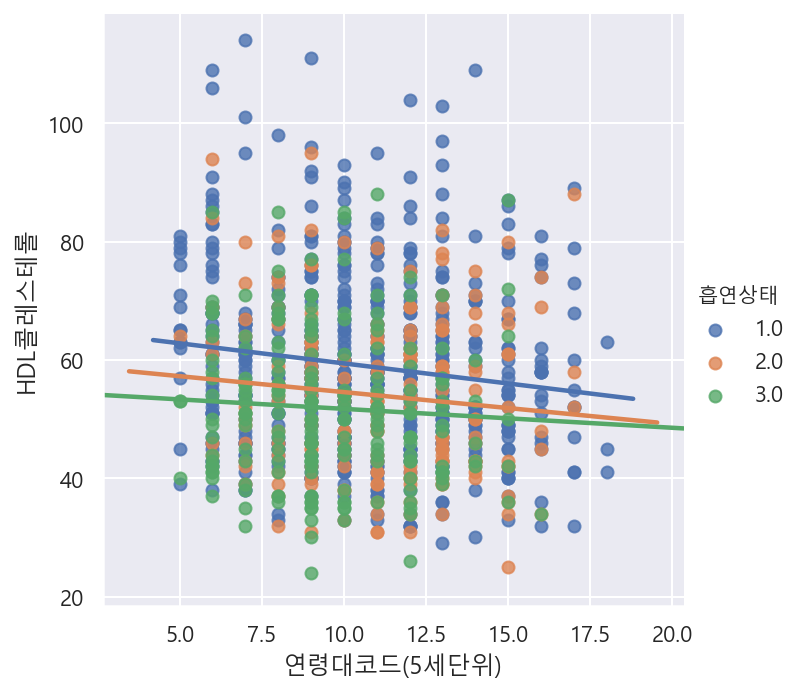

In [38]:
plt.figure(figsize=(10,10))
sns.lmplot(data=df_sample_HDL, x='연령대코드(5세단위)',y='HDL콜레스테롤', hue='흡연상태', ci=None)

↑HDL 콜레스테롤 수치의 경우 비흡연자가 흡연자에 비해 월등히 높게  나타나 보임(기사 내용과 동일)

# 전체 결론 : 비흡연자의 HDL콜레스테롤 수치가 흡연자보다 높은것은 사실이나 흡연자라고하여 LDL콜레스테롤과 총콜레스테롤, 트레클리세라이드 수치가 월등히 높은 것은 아니다.